<a href="https://colab.research.google.com/github/KLeeDE/ResearchProj_Flood/blob/master/3_DE_coastal_depth_latlon_ctract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FEMA Depth Grid (Raster Data)**

Type of Layer
*   **WSE_xxxxx** (Water Surface Elevation): WSE for the xxxx flood event or scenario. This raster is required to be produced for riverine Flood Risk Projects.

County
*   10001C: Kent County
*   10003C: New Castle County
*   10005C: Sussex County

Flood hazard is defined by a relation between depth of flooding and the annual chance of inundation greater than that depth.

Depth grid is defined by **the percent annual chance floods**. This is usually only **the 1% annual chance flood**.


**List of Raster Dataset**

*   CstDpth_01pct : Raster dataset of flood depth for a coastal 1% event. Coastal flood depth for the 1 percent annual chance flood event. This raster is required to be produced for coastal Flood Risk Projects [Feet]
*   Depth_01pct : Raster dataset of flood depth for a 1% event [Feet]
*   Depth_02pct : Raster dataset of flood depth for a 2% event [Feet]
*   Depth_04pct : Raster dataset of flood depth for a 4% event [Feet]
*   Depth_10pct : Raster dataset of flood depth for a 10% event [Feet]
*   Depth_0_2pct : Raster dataset of flood depth for a 0.2% event [Feet]
*   Depth_01plus : Raster dataset of flood depth for a 1% plus event [Feet]
*   Pct30yrChance : Raster dataset of the Percent 30yr Chance Grid. Percent chance of flooding over a 30-year period. This raster is required to be produced for riverine Flood Risk Projects.[Percent]
*   PctAnnChance : Raster dataset of the Percent Annual Chance Grid. Percent annual chance of flooding. This raster is required to be produced for riverine Flood Risk Projects.[Percent]
*   WSE_01pct : Raster dataset of the water surface for a 1% event [Feet]
*   WSE_02pct : Raster dataset of the water surface for a 2% event [Feet]
*   WSE_04pct : Raster dataset of the water surface for a 4% event [Feet]
*   WSE_10pct : Raster dataset of the water surface for a 10% event [Feet]
*   WSE_0_2pct : Raster dataset of the water surface for a 1% plus event [Feet]
*   WSE_01plus : Raster dataset of the water surface for a 1% plus event [Feet]

NOTE: Hillshade is a raster dataset for the hillshade of the watershed shown on the FRM


Unit [Link](https://www.fema.gov/media-library-data/1524249062040-8a315833d69131560239507668fa779b/Flood_Risk_Database_Technical_Reference_Feb_2018.pdf)




## **Kent (10001C)**

### **Coastal Area of Kent (10001C_Coastal_GeoTIFFS)**

In [ ]:
# -- mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -- install geospatial packages
!sudo apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import geopandas as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gdal
from gdalconst import *
from shapely.geometry import Point
from collections import Counter

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
# -- set filename : Kent

# Folder: FRD_10001C_Coastal_GeoTIFFS_20140502
fname1C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif"
fname1C_Cst_WSE_01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_WSE_01pct.tif"

In [ ]:
# -- set filename : Depth grid
# -- Kent (10001C)
fname1C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif"
# -- New Castle (10003C)
fname3C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif"
# -- Sussex (1005C)
fname5C_Cst_Dpth01pct = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif"

In [ ]:
# -- create and read in a raster
rast1C_Cst_Dpth01pct = gdal.Open(fname1C_Cst_Dpth01pct, GA_ReadOnly)
rast1C_Cst_WSE_01pct = gdal.Open(fname1C_Cst_WSE_01pct , GA_ReadOnly)

In [ ]:
# -- create and read in a raster : Depth grid
rast1C_Cst_Dpth01pct = gdal.Open(fname1C_Cst_Dpth01pct, GA_ReadOnly)
rast3C_Cst_Dpth01pct = gdal.Open(fname3C_Cst_Dpth01pct, GA_ReadOnly)
rast5C_Cst_Dpth01pct = gdal.Open(fname5C_Cst_Dpth01pct, GA_ReadOnly)

In [ ]:
# -- extract raster to array (and sub sample)
samp = 10
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr1C_Cst_WSE_01pct = rast1C_Cst_WSE_01pct.ReadAsArray()[::samp, ::samp]

In [ ]:
# -- extract raster to array : Depth grid
samp=10
arr1C_Cst_Dpth01pct = rast1C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr3C_Cst_Dpth01pct = rast3C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]
arr5C_Cst_Dpth01pct = rast5C_Cst_Dpth01pct.ReadAsArray()[::samp, ::samp]

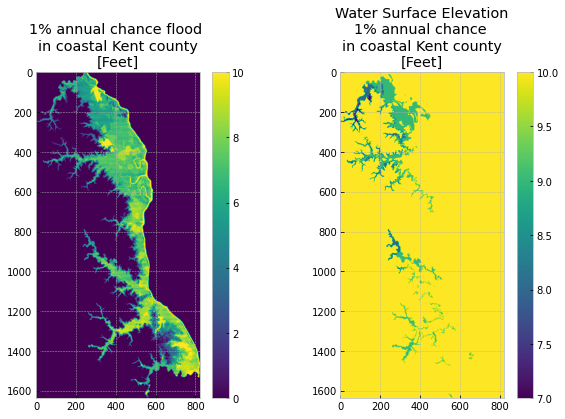

In [ ]:
# -- plot raster 
fig_raster_kent, ax = plt.subplots(1, 2, figsize=[10, 6])
im0 = ax[0].imshow(arr1C_Cst_Dpth01pct.clip(0,10))
im1 = ax[1].imshow(arr1C_Cst_WSE_01pct.clip(0,10))

ax[0].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[1].set_title("Water Surface Elevation\n1% annual chance \nin coastal Kent county\n[Feet]")

fig_raster_kent.colorbar(im0, ax=ax[0])
fig_raster_kent.colorbar(im1, ax=ax[1])
fig_raster_kent.savefig("/content/drive/My Drive/flooding/figure/20200722_UOmeeting")

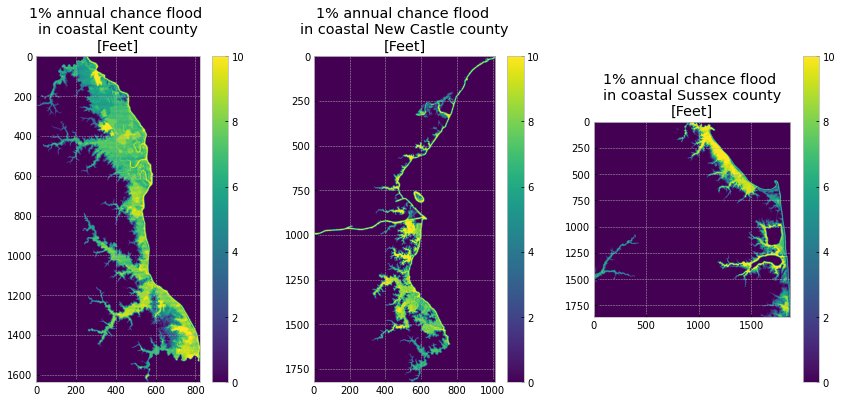

In [ ]:
# -- plot raster 
fig_raster, ax = plt.subplots(1, 3, figsize=[15, 6])
im0 = ax[0].imshow(arr1C_Cst_Dpth01pct.clip(0,10))
im1 = ax[1].imshow(arr3C_Cst_Dpth01pct.clip(0,10))
im2 = ax[2].imshow(arr5C_Cst_Dpth01pct.clip(0,10))

ax[0].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[1].set_title("1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[2].set_title("1% annual chance flood \nin coastal Sussex county\n[Feet]")

fig_raster.colorbar(im0, ax=ax[0])
fig_raster.colorbar(im1, ax=ax[1])
fig_raster.colorbar(im2, ax=ax[2])

fig_raster.savefig("/content/drive/My Drive/flooding/figure/20200722_UOmeeting")

In [ ]:
# -- look at shapes of rasters
print(arr1C_Cst_Dpth01pct.shape)
print(arr1C_Cst_WSE_01pct.shape)

(1638, 822)
(1638, 822)


In [ ]:
# -- look at shapes of rasters
print(arr1C_Cst_Dpth01pct.shape)
print(arr3C_Cst_Dpth01pct.shape)
print(arr5C_Cst_Dpth01pct.shape)

(1638, 822)
(1825, 1014)
(1860, 1875)


## Kent county

In [ ]:
# -- read in the meta data file as list of strings: Kent county 
mname1c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Kent/FRD_10001C_Coastal_GeoTIFFS_20140502/10001C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname1c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

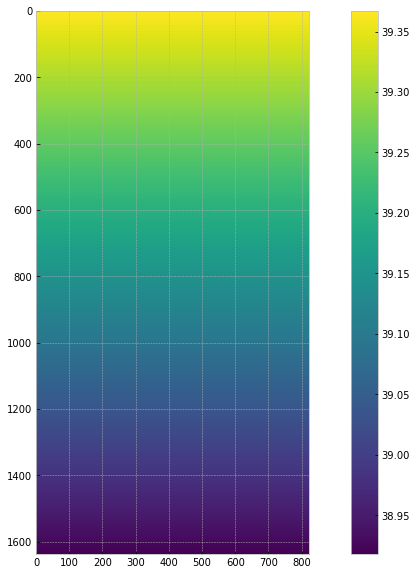

In [ ]:
# -- create lat and lon arrays

# -- get number of rows and cols
nrows1c, ncols1c = arr1C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows1c
dc   = (eastBL - westBL) / ncols1c

# -- generate a grid of row and col indices
cols1c, rows1c = np.meshgrid(np.arange(ncols1c), np.arange(nrows1c))

lat_grid_1c = ul_r - rows1c * dr
lon_grid_1c = ul_c + cols1c * dc

plt.imshow(lat_grid_1c)
plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

In [ ]:
lon_grid_1c

array([[-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265],
       [-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265],
       [-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265],
       ...,
       [-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265],
       [-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265],
       [-75.60006   , -75.59970635, -75.5993527 , ..., -75.31041995,
        -75.3100663 , -75.30971265]])

In [ ]:
dep_grid_1c = arr1C_Cst_Dpth01pct

In [ ]:
# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 400
icol = 400
print(lat_grid_1c[irow, icol])
print(lon_grid_1c[irow, icol])
print(dep_grid_1c[irow, icol])

39.25741388400488
-75.4585996593674
7.4


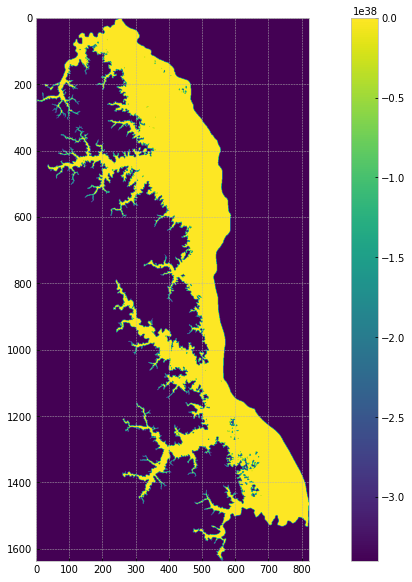

In [ ]:
plt.imshow(dep_grid_1c)
plt.colorbar()

(array([2.45830e+04, 3.42670e+04, 1.44189e+05, 7.27150e+04, 6.17500e+03,
        4.90800e+03, 5.57700e+03, 1.31700e+03, 1.84000e+02, 2.80000e+01]),
 array([ 0.  ,  2.59,  5.18,  7.77, 10.36, 12.95, 15.54, 18.13, 20.72,
        23.31, 25.9 ], dtype=float32),
 <a list of 10 Patch objects>)

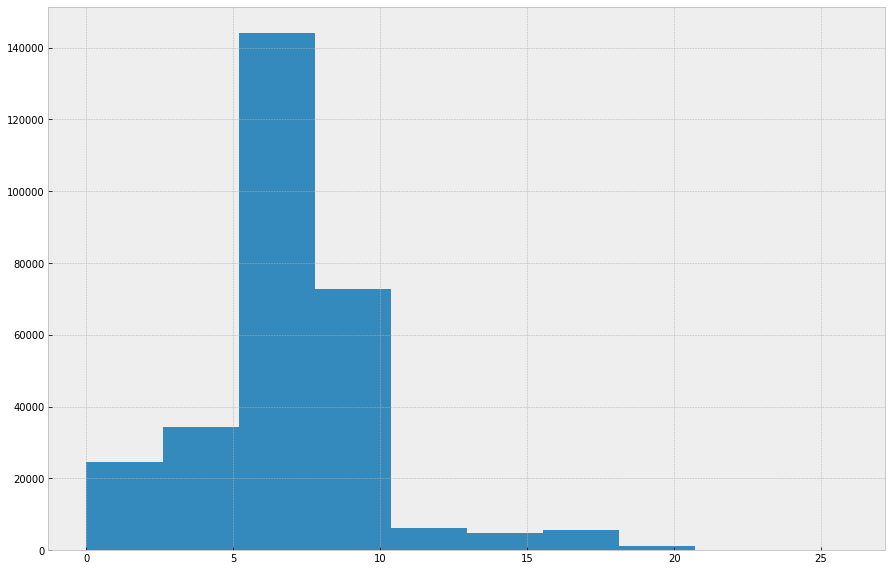

In [ ]:
plt.hist(dep_grid_1c[dep_grid_1c > -1e38].flatten())

## New Castle County

In [ ]:
# -- read in the meta data file as list of strings: New Castle county
mname3c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/New  Castle/FRD_10003C_Coastal_GeoTIFFS_20140516/10003C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname3c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

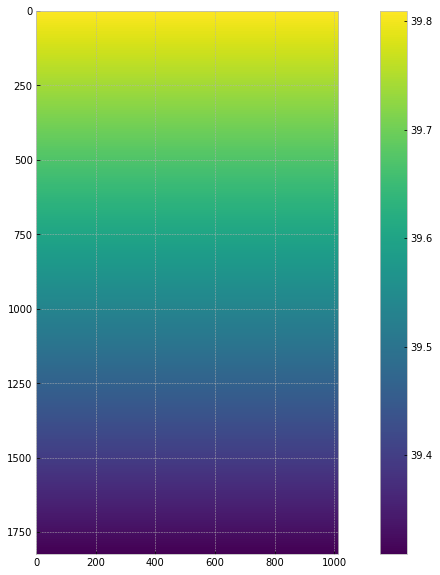

In [ ]:
# -- create lat and lon arrays

# -- get number of rows and cols
nrows3c, ncols3c = arr3C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows3c
dc   = (eastBL - westBL) / ncols3c

# -- generate a grid of row and col indices
cols3c, rows3c = np.meshgrid(np.arange(ncols3c), np.arange(nrows3c))

lat_grid_3c = ul_r - rows3c * dr
lon_grid_3c = ul_c + cols3c * dc

plt.imshow(lat_grid_3c)
plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

In [ ]:
lon_grid_3c

array([[-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476],
       [-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476],
       [-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476],
       ...,
       [-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476],
       [-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476],
       [-75.780931  , -75.78057524, -75.78021948, ..., -75.42125628,
        -75.42090052, -75.42054476]])

In [ ]:
dep_grid_3c = arr3C_Cst_Dpth01pct

In [ ]:
# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 400
icol = 400
print(lat_grid_3c[irow, icol])
print(lon_grid_3c[irow, icol])
print(dep_grid_3c[irow, icol])

39.699715383561646
-75.63862646351085
-3.4028235e+38


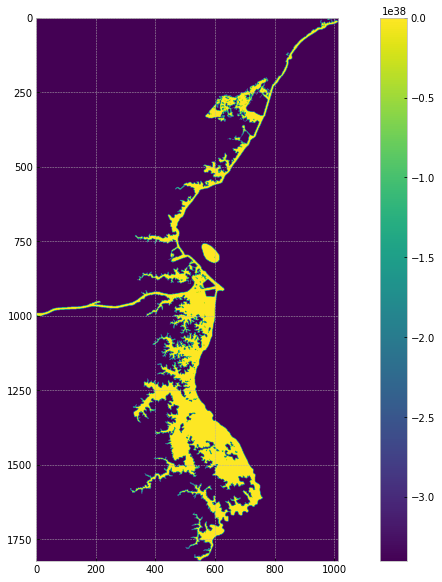

In [ ]:
plt.imshow(dep_grid_3c)
plt.colorbar()

(array([5.9442e+04, 6.5089e+04, 9.6060e+03, 1.3600e+03, 8.9600e+02,
        1.3430e+03, 1.2950e+03, 2.8700e+02, 1.9700e+02, 5.8000e+01]),
 array([ 0.      ,  7.13    , 14.26    , 21.390001, 28.52    , 35.65    ,
        42.780003, 49.910004, 57.04    , 64.170006, 71.3     ],
       dtype=float32),
 <a list of 10 Patch objects>)

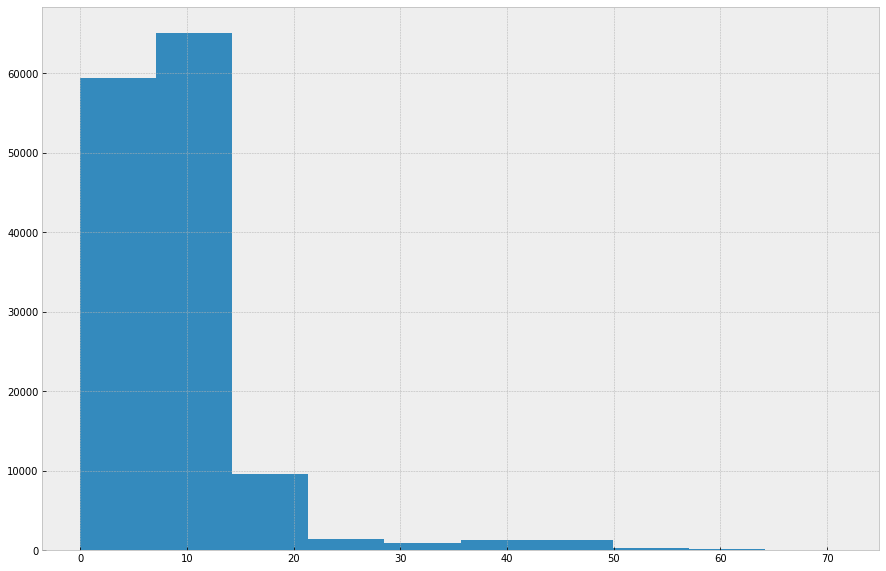

In [ ]:
plt.hist(dep_grid_3c[dep_grid_3c > -1e38].flatten())

## Sussex County

In [ ]:
# -- read in the meta data file as list of strings: New Castle county
mname5c = "/content/drive/My Drive/flooding/data/FEMA_Coastal_GeoTIFFs/Sussex/FRD_10005C_Coastal_GeoTIFFS_20140509/10005C_Coastal_CstDpth01pct.tif.xml"
fopen = open(mname5c, "r")
lines = [i for i in fopen]
fopen.close()

# -- get lat lon meta data
for line in lines:
  if "<westBL Sync=\"TRUE\">" in line:
    westBL = float(line.split("<westBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<eastBL Sync=\"TRUE\">" in line:
    eastBL = float(line.split("<eastBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<northBL Sync=\"TRUE\">" in line:
    northBL = float(line.split("<northBL Sync=\"TRUE\">")[2].split("<")[0])

  if "<southBL Sync=\"TRUE\">" in line:
    southBL = float(line.split("<southBL Sync=\"TRUE\">")[2].split("<")[0])

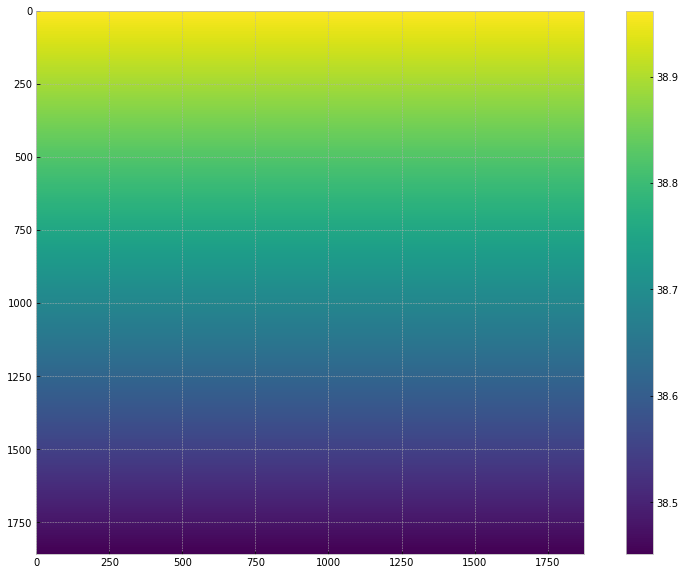

In [ ]:
# -- create lat and lon arrays

# -- get number of rows and cols
nrows5c, ncols5c = arr5C_Cst_Dpth01pct.shape

# -- define upperleft and resolution
ul_r = northBL
ul_c = westBL
dr   = (northBL - southBL) / nrows5c
dc   = (eastBL - westBL) / ncols5c

# -- generate a grid of row and col indices
cols5c, rows5c = np.meshgrid(np.arange(ncols5c), np.arange(nrows5c))

lat_grid_5c = ul_r - rows5c * dr
lon_grid_5c = ul_c + cols5c * dc

plt.imshow(lat_grid_5c)
plt.colorbar()

# plt.hist(np.log10(arr1C_Cst_Dpth01pct[arr1C_Cst_Dpth01pct > 0]))

In [ ]:
lon_grid_5c

array([[-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667],
       [-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667],
       [-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667],
       ...,
       [-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667],
       [-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667],
       [-75.703631  , -75.70327933, -75.70292767, ..., -75.04531   ,
        -75.04495833, -75.04460667]])

In [ ]:
dep_grid_5c = arr5C_Cst_Dpth01pct

In [ ]:
# now you have all the info you need!
# for example, what is the lat, lon, and depth at row=756 and col=331?
irow = 400
icol = 400
print(lat_grid_5c[irow, icol])
print(lon_grid_5c[irow, icol])
print(dep_grid_5c[irow, icol])

38.852024709677416
-75.56296412
-3.4028235e+38


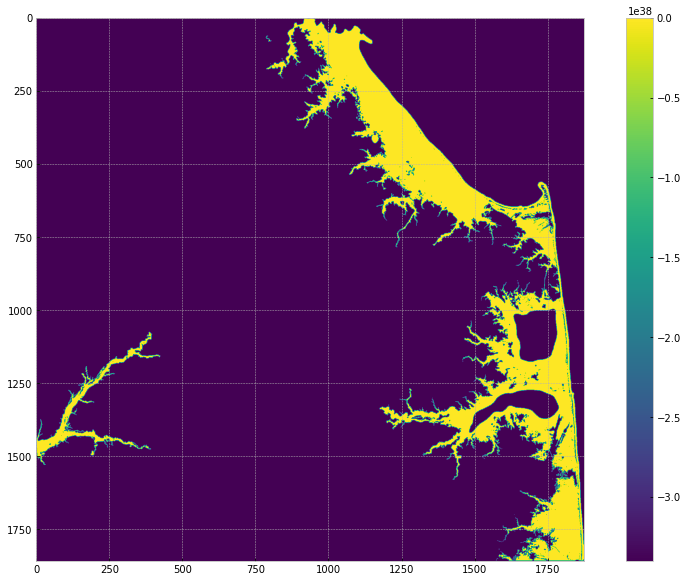

In [ ]:
plt.imshow(dep_grid_5c)
plt.colorbar()

(array([2.19834e+05, 1.25903e+05, 3.86700e+03, 1.08500e+03, 1.37000e+02,
        5.00000e+01, 4.00000e+01, 4.30000e+01, 6.90000e+01, 2.10000e+01]),
 array([ 0.      ,  8.51    , 17.02    , 25.529999, 34.04    , 42.55    ,
        51.059998, 59.57    , 68.08    , 76.59    , 85.1     ],
       dtype=float32),
 <a list of 10 Patch objects>)

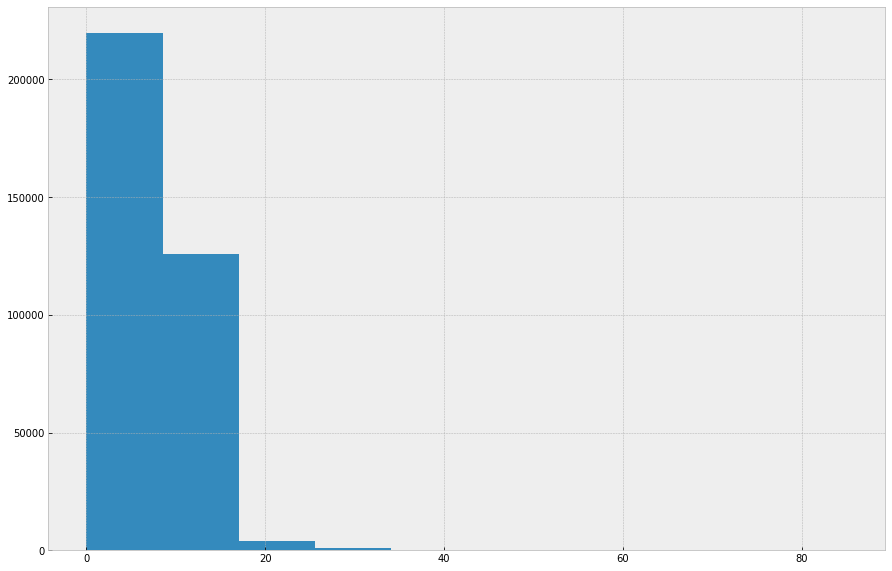

In [ ]:
plt.hist(dep_grid_5c[dep_grid_5c > -1e38].flatten())

## Merge raster data

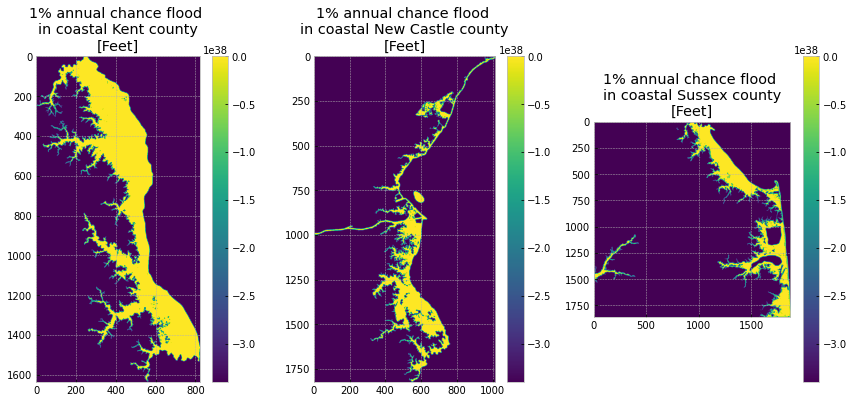

In [ ]:
# -- plot raster 
fig_raster_ed, ax = plt.subplots(1, 3, figsize=[15, 6])
im0 = ax[0].imshow(dep_grid_1c)
im1 = ax[1].imshow(dep_grid_3c)
im2 = ax[2].imshow(dep_grid_5c)

ax[0].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[1].set_title("1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[2].set_title("1% annual chance flood \nin coastal Sussex county\n[Feet]")

fig_raster_ed.colorbar(im0, ax=ax[0])
fig_raster_ed.colorbar(im1, ax=ax[1])
fig_raster_ed.colorbar(im2, ax=ax[2])

fig_raster_ed.savefig("/content/drive/My Drive/flooding/figure/20200722_UOmeeting")

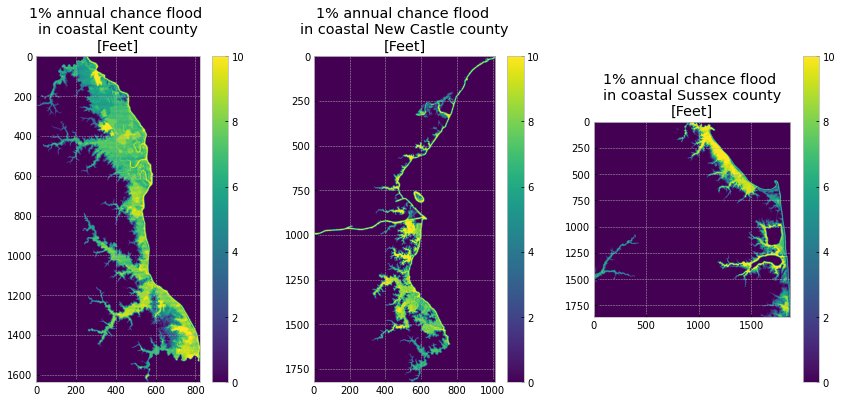

In [ ]:
# -- plot raster 
fig_raster_ed1, ax = plt.subplots(1, 3, figsize=[15, 6])
im0 = ax[0].imshow(dep_grid_1c.clip(0,10))
im1 = ax[1].imshow(dep_grid_3c.clip(0,10))
im2 = ax[2].imshow(dep_grid_5c.clip(0,10))

ax[0].set_title("1% annual chance flood \nin coastal Kent county\n[Feet]")
ax[1].set_title("1% annual chance flood \nin coastal New Castle county\n[Feet]")
ax[2].set_title("1% annual chance flood \nin coastal Sussex county\n[Feet]")

fig_raster_ed1.colorbar(im0, ax=ax[0])
fig_raster_ed1.colorbar(im1, ax=ax[1])
fig_raster_ed1.colorbar(im2, ax=ax[2])

fig_raster_ed1.savefig("/content/drive/My Drive/flooding/figure/20200722_UOmeeting")

# Census tract

In [ ]:
def label_plot(plot_axis, title, x_axis_label, y_axis_label, title_weight="bold", title_size=16, axis_weight="bold", axis_size=14 ):
  plot_axis.set_title(title, weight=title_weight, size=title_size)
  plot_axis.set_xlabel(x_axis_label, weight=axis_weight, size=axis_size)
  plot_axis.set_ylabel(y_axis_label, weight=axis_weight, size=axis_size)

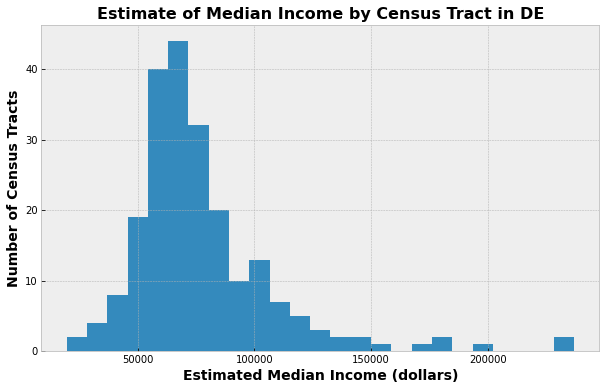

In [ ]:
# -- mean income
income = pd.read_csv("/content/drive/My Drive/flooding/data/2014-5year-ACS/ACSST5Y2014.S1902_meanincome/ACSST5Y2014.S1902_data_with_overlays_2020-05-07T144335.csv", skiprows=1)
income.columns.tolist()
income
cols_sub = ['id', 'Geographic Area Name', 'Total!!Estimate!!All households', 'Mean income (dollars)!!Estimate!!All households']
income_sub = income[cols_sub]
income_sub.columns = ['ctractid', 'Geographic Area Name', 'Number of Households', 'Median Income (estimate)']
income_sub = income_sub[income_sub['Median Income (estimate)'] != '-'].copy()
income_sub['Median Income (estimate)'] = income_sub['Median Income (estimate)'].astype(int)
income_sub["ctractid"] = income_sub["ctractid"].str[-11:].copy()
income_sub
# -- Plot mean income
fig_income, ax = plt.subplots(figsize=[10,6])
income_sub.hist('Median Income (estimate)', ax=ax, bins=25)
label_plot(ax, "Estimate of Median Income by Census Tract in DE", "Estimated Median Income (dollars)", "Number of Census Tracts", axis_size=14, title_size=16)
fig_income.show()

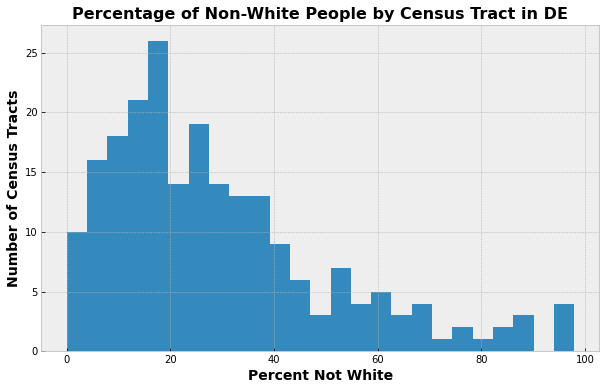

In [ ]:
# -- Race 
# county level
race = pd.read_csv("/content/drive/My Drive/flooding/data/2014-5year-ACS/ACSDT5Y2014.B02001_race/ACSDT5Y2014.B02001_data_with_overlays_2020-05-07T150916.csv", skiprows=1)
race.columns.tolist
race['White'] = race['Estimate!!Total!!White alone'] 
race['Non-white'] = race['Estimate!!Total'] - race['Estimate!!Total!!White alone'] 
race['Percent White'] = race['Estimate!!Total!!White alone'] / race['Estimate!!Total']*100
race['Percent Non-white'] = race['Non-white'] / race['Estimate!!Total']*100
race.dropna()
race.columns
cols_sub = ['id', 'Geographic Area Name', 'White', 'Non-white', 'Percent White', 'Percent Non-white']
race_sub = race[cols_sub]
race_sub.columns = ['ctractid', 'Geographic Area Name', 'White', 'Non-white', 'Percent White', 'Percent Non-white']
race_sub = race_sub.dropna()
race_sub["ctractid"] = race_sub["ctractid"].str[-11:].copy()
race_sub
# -- Plot race
fig_race, ax = plt.subplots(figsize=[10,6])
race_sub.hist('Percent Non-white', ax=ax, bins=25)
label_plot(ax, "Percentage of Non-White People by Census Tract in DE", "Percent Not White", "Number of Census Tracts", title_size=16, axis_size=14)
fig_race.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


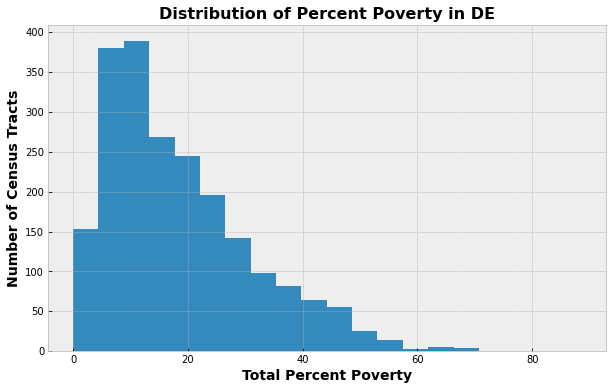

In [ ]:
# Poverty by census tract
# -- county level
fname = "/content/drive/My Drive/mlpp20_group/data/ACS_2017_Poverty_by_ct.csv"
poverty = pd.read_csv(fname, skiprows=1)
poverty.columns.tolist()
poverty["percent_pop_below_poverty_level"] = poverty["Estimate!!Percent below poverty level!!Population for whom poverty status is determined"]
poverty.dropna()
poverty.columns
cols_sub = ['id', 'Geographic Area Name', 'percent_pop_below_poverty_level']
poverty_sub = poverty[cols_sub]
poverty_sub.columns = ['ctractid', 'Geographic Area Name', 'percent_pop_below_poverty_level']
poverty_sub["ctractid"] = poverty_sub["ctractid"].str[-11:].copy()
poverty_sub["percent_pop_below_poverty_level"] = pd.to_numeric(poverty["percent_pop_below_poverty_level"], errors='coerce')
poverty_sub = poverty_sub.dropna().copy()
poverty_sub
# -- Plot poverty
fig_poverty, ax = plt.subplots(figsize=[10, 6])
poverty_sub.hist("percent_pop_below_poverty_level", ax=ax, bins=20)
label_plot(ax, "Distribution of Percent Poverty in DE", "Total Percent Poverty", "Number of Census Tracts", title_size=16, axis_size=14)
fig_poverty.show()

In [ ]:
#--Getting standardized values
def standardize(dataframe, original_column_name:str, intended_column_name:str):
  values = dataframe[original_column_name]
  values_mean = values.mean()
  values_stdev = values.std()
  standardized_values = []
  for i in values:
    standardized_values.append((i-values_mean)/values_stdev)
  dataframe[intended_column_name] = standardized_values

In [ ]:
#--Getting standardized values
standardize(income_sub, "Median Income (estimate)", "median_income_st")
standardize(race_sub, "Percent Non-white", "percent_not_white_st")
# Merging with census tract geodataframe
race_income = race_sub.merge(income_sub, left_on="ctractid", right_on="ctractid")
demo = race_income
demo

,ctractid,Geographic Area Name_x,White,Non-white,Percent White,Percent Non-white,percent_not_white_st,Geographic Area Name_y,Number of Households,Median Income (estimate),median_income_st
0,0000US10001,"Kent County, Delaware",113563,53914,67.808117,32.191883,0.123286,"Kent County, Delaware",59142,67230,-0.318168
1,0000US10003,"New Castle County, Delaware",360264,185582,66.001033,33.998967,0.205843,"New Castle County, Delaware",201543,85814,0.278632
2,0000US10005,"Sussex County, Delaware",165527,38210,81.245429,18.754571,-0.490601,"Sussex County, Delaware",78361,68578,-0.274879
3,10005050104,"Census Tract 501.04, Sussex County, Delaware",3722,497,88.219957,11.780043,-0.809234,"Census Tract 501.04, Sussex County, Delaware",1597,74561,-0.082743
4,10005050105,"Census Tract 501.05, Sussex County, Delaware",4226,2226,65.499070,34.500930,0.228775,"Census Tract 501.05, Sussex County, Delaware",2071,60344,-0.539302
...,...,...,...,...,...,...,...,...,...,...,...
213,10003016901,"Census Tract 169.01, New Castle County, Delaware",1850,108,94.484168,5.515832,-1.095417,"Census Tract 169.01, New Castle County, Delaware",854,78001,0.027728
214,10003016904,"Census Tract 169.04, New Castle County, Delaware",2218,1851,54.509708,45.490292,0.730827,"Census Tract 169.04, New Castle County, Delaware",497,68140,-0.288944
215,10005050101,"Census Tract 501.01, Sussex County, Delaware",2787,704,79.833858,20.166142,-0.426113,"Census Tract 501.01, Sussex County, Delaware",1296,65617,-0.369967
216,10005050103,"Census Tract 501.03, Sussex County, Delaware",3590,802,81.739526,18.260474,-0.513174,"Census Tract 501.03, Sussex County, Delaware",1728,73712,-0.110007


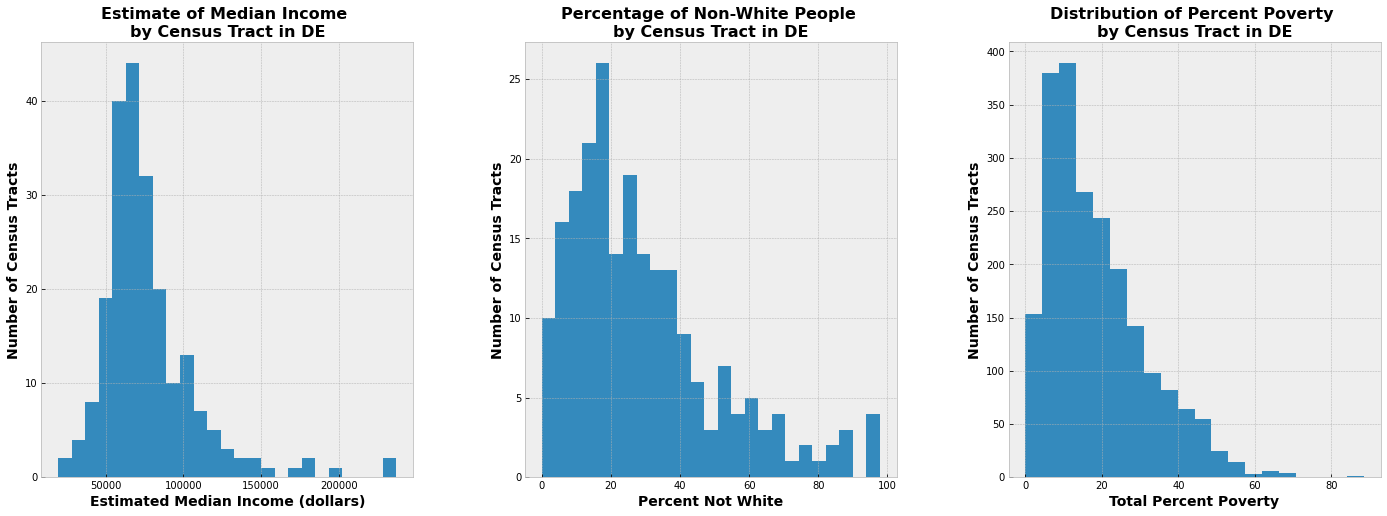

In [ ]:
fig_demo, ax=plt.subplots(nrows=1, ncols=3, figsize=[24, 8])
plot0 = ax[0]
plot1 = ax[1]
plot2 = ax[2]

income_sub.hist('Median Income (estimate)', ax=plot0, bins=25)
label_plot(plot0, "Estimate of Median Income \nby Census Tract in DE", "Estimated Median Income (dollars)", "Number of Census Tracts", axis_size=14, title_size=16)
race_sub.hist('Percent Non-white', ax=plot1, bins=25)
label_plot(plot1, "Percentage of Non-White People \nby Census Tract in DE", "Percent Not White", "Number of Census Tracts", title_size=16, axis_size=14)
poverty_sub.hist("percent_pop_below_poverty_level", ax=plot2, bins=20)
label_plot(plot2, "Distribution of Percent Poverty \nby Census Tract in DE", "Total Percent Poverty", "Number of Census Tracts", title_size=16, axis_size=14)
fig_demo.savefig("/content/drive/My Drive/flooding/figure/20200722_UOmeeting")
fig_demo.show()

In [ ]:
# Merge counties (Kent + New Castle + Sussex)
kent4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Kent county/FRD_10001C_Coastal_ShapeFiles_20140502/S_CenBlk_Ar.shp")
ncastle4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/New castle county/FRD_10003C_Coastal_ShapeFiles_20140516/S_CenBlk_Ar.shp")
sussex4 = gp.read_file("/content/drive/My Drive/flooding/data/FEMA data/Sussex county/FRD_10005C_Coastal_ShapeFiles_20140509/S_CenBlk_Ar.shp")
fnames4 = [kent4, ncastle4, sussex4]
sh2014 = pd.concat(fnames4)

In [ ]:
# Merging -  Census Block -> Census tract (geodataframe)
cols_sub = ['CEN_BLK_ID', 'geometry', 'POPULATION']
sh2014_sub = sh2014[cols_sub]
sh2014_sub.columns = ['cblockid', 'Geometry', 'Population']
sh2014_sub
sh2014_sub["ctractid"] = sh2014_sub["cblockid"].str[:11].copy()
sh2014_sub["cblock"] = sh2014_sub["cblockid"].str[11:].copy()
sh2014_sub
sh2014_sub_gcount = sh2014_sub.groupby("ctractid").count().reset_index()
sh2014_sub_gcount

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,ctractid,cblockid,Geometry,Population,cblock
0,10001040201,60,60,60,60
1,10001040202,124,124,124,124
2,10001040203,70,70,70,70
3,10001040400,100,100,100,100
4,10001040500,134,134,134,134
...,...,...,...,...,...
153,10005051500,111,111,111,111
154,10005051701,5,5,5,5
155,10005051801,151,151,151,151
156,10005051802,148,148,148,148


# Geocoding coordinates to census tract


In [ ]:
# -- create a DataFrame of the depth grid
df_dgrid = pd.DataFrame(columns=["lat", "lon", "dep"])

In [ ]:
# -- renaming for ease of use...
dep_grid = arr1C_Cst_Dpth01pct

In [ ]:
# -- assign column values
df_dgrid["lat"] = lat_grid.flatten()
df_dgrid["lon"] = lon_grid.flatten()
df_dgrid["dep"] = dep_grid.flatten()

In [ ]:
def make_point(x):
  return Point(x["lon"], x["lat"])

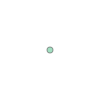

In [ ]:
make_point(df_dgrid.iloc[0])

In [ ]:
df_dgrid

,lat,lon,dep
0,38.961926,-75.703631,-3.402823e+38
1,38.961926,-75.702829,-3.402823e+38
2,38.961926,-75.702027,-3.402823e+38
3,38.961926,-75.701225,-3.402823e+38
4,38.961926,-75.700422,-3.402823e+38
...,...,...,...
1346431,38.451197,-75.048266,-3.402823e+38
1346432,38.451197,-75.047464,-3.402823e+38
1346433,38.451197,-75.046661,-3.402823e+38
1346434,38.451197,-75.045859,-3.402823e+38


In [ ]:
df_dgrid["geometry"] = df_dgrid.apply(make_point, axis=1)

In [ ]:
df_dgrid = gp.GeoDataFrame(df_dgrid)

In [ ]:
df_dgrid

,lat,lon,dep,geometry
0,38.961926,-75.703631,-3.402823e+38,POINT (-75.70363 38.96193)
1,38.961926,-75.702829,-3.402823e+38,POINT (-75.70283 38.96193)
2,38.961926,-75.702027,-3.402823e+38,POINT (-75.70203 38.96193)
3,38.961926,-75.701225,-3.402823e+38,POINT (-75.70122 38.96193)
4,38.961926,-75.700422,-3.402823e+38,POINT (-75.70042 38.96193)
...,...,...,...,...
1346431,38.451197,-75.048266,-3.402823e+38,POINT (-75.04827 38.45120)
1346432,38.451197,-75.047464,-3.402823e+38,POINT (-75.04746 38.45120)
1346433,38.451197,-75.046661,-3.402823e+38,POINT (-75.04666 38.45120)
1346434,38.451197,-75.045859,-3.402823e+38,POINT (-75.04586 38.45120)


In [ ]:
# -- load the centract shapes
ctsname = "/content/drive/My Drive/flooding/data/tl_2017_10_tract/tl_2017_10_tract.shp"
dect_2017 = gp.read_file(ctsname)

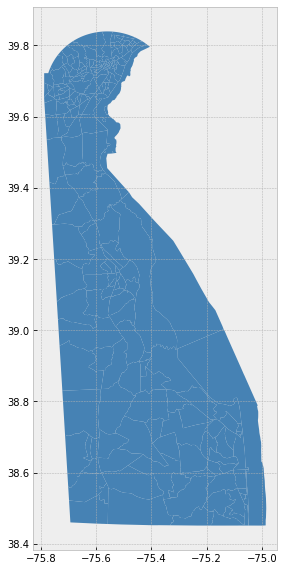

In [ ]:
dect_2017.plot(color="steelblue")

In [ ]:
dect_2017

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,001,040502,10001040502,405.02,Census Tract 405.02,G5020,S,29380975,461377,+39.2124212,-075.5318919,"POLYGON ((-75.58160 39.24208, -75.58145 39.242..."
1,10,001,043202,10001043202,432.02,Census Tract 432.02,G5020,S,295721374,46419973,+39.1456066,-075.4324489,"POLYGON ((-75.54956 39.35384, -75.54939 39.353..."
2,10,001,040501,10001040501,405.01,Census Tract 405.01,G5020,S,10394105,0,+39.1995840,-075.5439015,"POLYGON ((-75.58810 39.24403, -75.58806 39.244..."
3,10,001,990000,10001990000,9900,Census Tract 9900,G5020,S,0,495919229,+39.1258693,-075.3111928,"POLYGON ((-75.51194 39.36595, -75.51178 39.366..."
4,10,001,043400,10001043400,434,Census Tract 434,G5020,S,66115677,653023,+38.9723618,-075.4729061,"POLYGON ((-75.52892 39.01019, -75.52871 39.010..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,10,003,013100,10003013100,131,Census Tract 131,G5020,S,1613787,0,+39.7263367,-075.6452156,"POLYGON ((-75.65822 39.72372, -75.65810 39.723..."
214,10,003,013200,10003013200,132,Census Tract 132,G5020,S,1501029,0,+39.7352253,-075.6451879,"POLYGON ((-75.65585 39.73491, -75.65563 39.735..."
215,10,003,013000,10003013000,130,Census Tract 130,G5020,S,1224452,0,+39.7192005,-075.6426024,"POLYGON ((-75.65289 39.71829, -75.65157 39.719..."
216,10,003,013400,10003013400,134,Census Tract 134,G5020,S,2521158,0,+39.7425629,-075.6542951,"POLYGON ((-75.66617 39.73174, -75.66614 39.731..."


In [ ]:
df_dgrid_dect_2017 = gp.sjoin(df_dgrid, dect_2017)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  """Entry point for launching an IPython kernel.


In [ ]:
df_dgrid_dect_2017

,lat,lon,dep,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,38.961926,-75.703631,-3.402823e+38,POINT (-75.70363 38.96193),200,10,001,043100,10001043100,431,Census Tract 431,G5020,S,154160050,2518,+38.8949961,-075.6713506
1,38.961926,-75.702829,-3.402823e+38,POINT (-75.70283 38.96193),200,10,001,043100,10001043100,431,Census Tract 431,G5020,S,154160050,2518,+38.8949961,-075.6713506
2,38.961926,-75.702027,-3.402823e+38,POINT (-75.70203 38.96193),200,10,001,043100,10001043100,431,Census Tract 431,G5020,S,154160050,2518,+38.8949961,-075.6713506
3,38.961926,-75.701225,-3.402823e+38,POINT (-75.70122 38.96193),200,10,001,043100,10001043100,431,Census Tract 431,G5020,S,154160050,2518,+38.8949961,-075.6713506
4,38.961926,-75.700422,-3.402823e+38,POINT (-75.70042 38.96193),200,10,001,043100,10001043100,431,Census Tract 431,G5020,S,154160050,2518,+38.8949961,-075.6713506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346338,38.451197,-75.122867,-3.402823e+38,POINT (-75.12287 38.45120),8,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118745,1659919,+38.4682914,-075.1333154
1346339,38.451197,-75.122065,-3.402823e+38,POINT (-75.12206 38.45120),8,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118745,1659919,+38.4682914,-075.1333154
1346340,38.451197,-75.121262,-3.402823e+38,POINT (-75.12126 38.45120),8,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118745,1659919,+38.4682914,-075.1333154
1346341,38.451197,-75.120460,-3.402823e+38,POINT (-75.12046 38.45120),8,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118745,1659919,+38.4682914,-075.1333154
